In [2]:
#installer les deux pour créer la mp4 de bar chart race de medal rank
#pip install bar_chart_race
#conda install -c conda-forge ffmpeg

#installer pyecharts
#pip install pyecharts

In [ ]:
#Lorsque nous avons soumis notre sujet de projet, notre source de données était le site web officiel des Jeux olympiques.
#mais nous avons ensuite constaté que les données présentées sur le site web des Jeux olympiques n'étaient pas suffisantes pour notre analyse.
#(Il n'y a pas de données sur le moment où chaque médaille a été gagnée)
#Donc nous avons changé notre source de données pour les données de kaggle. 

#Voici le lien vers les données: https://www.kaggle.com/piterfm/tokyo-2020-olympics

#Afin d'éviter que les auteurs de kaggle n'apportent des modifications aux pages qui les rendraient illisibles. 
#Au lieu d'aller chercher le fichier directement dans le code, nous avons téléchargé le fichier de données localement, puis nous l'avons lu.

In [1]:
import pandas as pd

#Récupérer des données, effacer des espaces
df_medals = pd.read_csv("medals.csv",sep=",")
df_medals.rename(columns=lambda x: x.strip() if isinstance(x, str) else x, inplace=True)

#Définir la fonction qui définit le format de la date
def time_format(x):
    return x.strftime("%m-%d")

#Créer un dataframe vide
date_list = [x.strftime('%m-%d') for x in list(pd.date_range(start='20210724', end='20210808'))]
medal_null_list = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
df_null = pd.DataFrame({"medal_date":date_list,"medal_null":medal_null_list})

#Formater la date
df_medals["medal_date"] = pd.to_datetime(df_medals["medal_date"]).map(time_format)

#Supprimer des données en double
list_country = df_medals["country"].tolist()
list_country = list(set(list_country))

df_rank = df_null

#Construire le dataframe que nous voulons
for country_x in list_country:
    
    #Sélectionner les données du pays spécifié, créer le dataframe
    df_medals_country = df_medals[df_medals["country"]== country_x][["medal_type","medal_date","event"]]

    #Permettre de conserver un seul record pour les épreuves d’équipe (plusieurs enregistrements 
    #remportant effectivement la même médaille)
    df_medals_country = df_medals_country.drop_duplicates().reindex()

    #Calculer le nombre cumulé de médailles
    df_medals_country = df_medals_country.groupby(["medal_date"])["medal_type"].count().cumsum()
    df_medals_country = df_medals_country.reset_index()

    #Établir un dataframe vide, fusionné avec les données extraites
    #permettant d’avoir des données cumulatives sur les médailles même pour les dates sans médailles gagnées
    #Uniformiser l’intervalle des abscisses des lignes pour chaque pays
    df = pd.merge(df_medals_country,df_null,how='outer',on='medal_date')
    df["medal_cum"]=df["medal_type"]+df["medal_null"]

    #Nettoyage des données de sorte que la valeur vide (nombre de médailles accumulées) 
    #soit égale au nombre de médailles accumulées la veille, et ne conserver que des données nécessaires
    df = df.sort_values(by="medal_date").reset_index()
    df = df.fillna(method='ffill',axis=0)
    df = pd.DataFrame(df,columns = ["medal_date","medal_cum"])
    
    #Ajouter des colonnes au dataframe
    df_rank = df_rank.merge(df)
    df_rank = df_rank.rename(columns={"medal_cum":country_x})
    
df_rank



,medal_date,medal_null,Finland,Ukraine,Canada,Kyrgyzstan,Latvia,Belgium,Bermuda,Bulgaria,...,Japan,Czech Republic,Turkey,Croatia,Qatar,India,Greece,Sweden,Hungary,Netherlands
0,07-24,0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,...,2,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0
1,07-25,0,NaN,2.0,2.0,NaN,NaN,1.0,NaN,1.0,...,6,NaN,2.0,NaN,NaN,1.0,NaN,NaN,2.0,2.0
2,07-26,0,NaN,2.0,4.0,NaN,NaN,1.0,NaN,1.0,...,13,2.0,2.0,2.0,NaN,1.0,NaN,NaN,2.0,3.0
3,07-27,0,NaN,3.0,8.0,NaN,NaN,2.0,1.0,1.0,...,18,2.0,2.0,2.0,NaN,1.0,NaN,NaN,2.0,3.0
4,07-28,0,NaN,3.0,9.0,NaN,1.0,2.0,1.0,1.0,...,22,2.0,2.0,2.0,NaN,1.0,NaN,NaN,5.0,11.0
5,07-29,0,1.0,4.0,10.0,NaN,1.0,2.0,1.0,1.0,...,25,4.0,2.0,3.0,NaN,1.0,NaN,NaN,5.0,13.0
6,07-30,0,1.0,4.0,11.0,NaN,1.0,2.0,1.0,1.0,...,28,6.0,2.0,6.0,NaN,1.0,1.0,NaN,5.0,15.0
7,07-31,0,1.0,5.0,12.0,NaN,1.0,2.0,1.0,1.0,...,30,7.0,3.0,6.0,1.0,1.0,1.0,2.0,6.0,16.0
8,08-01,0,1.0,6.0,14.0,NaN,1.0,3.0,1.0,1.0,...,31,8.0,3.0,7.0,2.0,2.0,1.0,4.0,6.0,17.0
9,08-02,0,1.0,6.0,14.0,NaN,1.0,3.0,1.0,1.0,...,33,8.0,5.0,7.0,2.0,2.0,3.0,4.0,6.0,18.0


Le pays que vous voulez consulter est? Canada


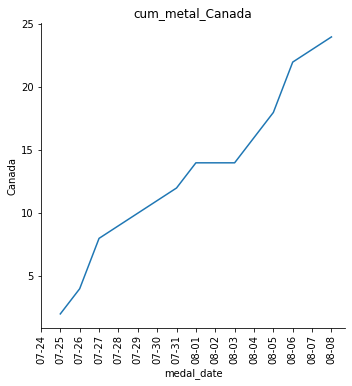

In [2]:
import seaborn
#Demander le pays 
country_enter = input("Le pays que vous voulez consulter est? ")
if country_enter not in list_country:
    print("Vérifiez le nom du pays!")
else:
    #Réalisation de diagrammes linéaires
    line_medals = seaborn.relplot(kind='line', x='medal_date', y= country_enter,palette = 'bright',data=df_rank)
    line_medals.set(title="cum_metal_{}".format(country_enter)).set_xticklabels(labels = df['medal_date'],rotation=90)

In [3]:
import bar_chart_race as bcr

#Modification des fichiers pour la création de bar chart race
df_rank = df_rank.set_index(["medal_date"])
df_rank.to_csv()
#Réalisation de bar chart race
bcr.bar_chart_race(df_rank, n_bars=10, cmap='accent', filter_column_colors=True,steps_per_period=20,period_length = 1000)

#Le chargement de la vidéo prendra un certain temps. 
#Si une erreur est signalée indiquant un dépassement de délai, veuillez patienter un peu plus longtemps.

D:\software\python\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\software\python\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\software\python\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\software\python\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\software\python\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\software\python\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 132 missing 

D:\software\python\anaconda\lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


In [4]:
from pyecharts.charts import Map
from pyecharts import options as opts

#Lire des données
df = pd.read_csv("medals_total.csv",sep=",")
df.rename(columns=lambda x: x.strip() if isinstance(x, str) else x, inplace=True)

#Normaliser des données
df = df.reset_index(drop=True)
df.columns = ['Rank','Country Code','Gold Medal','Silver Medal','Bronze Medal','Total','Country']
df['Country'].replace(['ROC','United States of America','People\'s Republic of China','Republic of Moldova','Republic of Korea'],['Russia','United States','China','Moldova','Korea'],inplace=True)
df['Total'] = df['Total'].astype('object')

#Construire un map
m1 = (
    Map()
    .add("Total", [list(z) for z in zip(df['Country'].values, df['Total'].values)], "world", is_map_symbol_show=False,
         is_roam=False)
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="2020 Tokyo Olympics Medal Map"),
        legend_opts=opts.LegendOpts(is_show=False),
        visualmap_opts=opts.VisualMapOpts(is_show=True, max_=120,
                                          is_piecewise=True,
                                          split_number = 10,
                                          range_color=['#FFFFE0', '#FFA07A', '#CD5C5C', '#8B0000']
                                         ),        
    )
)
#Réalisation
m1.render_notebook()


In [5]:
#Séparer les informations du fichier par la virgule
df_medals = pd.read_csv("medals.csv", sep=",") 
df_medals_total = pd.read_csv("medals_total.csv", sep=",") 
#Les cinq premiers pays en termes de médailles totales gagnées pour l'analyse suivante
df_medals_total.sort_values(by=["Total"], ascending = False).head(5) 

,Rank,Country Code,Gold Medal,Silver Medal,Bronze Medal,Total,Country
0,1,USA,39,41,33,113,United States of America
1,2,CHN,38,32,18,88,People's Republic of China
4,5,ROC,20,28,23,71,ROC
3,4,GBR,22,21,22,65,Great Britain
2,3,JPN,27,14,17,58,Japan


In [6]:
#Obtenir le nombre de médailles remportées par chaque pays dans chaque discipline
df_medals_detail = pd.pivot_table(df_medals,values = ['medal_code'],index = ['country_code','discipline'],aggfunc = 'count') 
#Nombre de médailles remportées par les États-Unis pour chaque discipline
df_medals_USA = df_medals_detail.query("country_code == ['USA']").sort_values(by=["medal_code"], ascending = False) 
#Les 10 disciplines les plus médaillés aux États-Unis
df_medals_USA_top = df_medals_USA.head(10) 
df_medals_USA_top
#Obtenir le nombre total de médailles gagnées dans d'autres disciplines
print(f"Nombre total d'attributions pour d'autres projets: {df_medals_USA.tail(17)['medal_code'].sum()}") 


Nombre total d'attributions pour d'autres projets: 49


In [7]:
# Stocker le nombre total de médailles gagnées par d'autres disciplines auxquels les États-Unis participent dans un datarame appelé df_medals_USA_others
df_medals_USA_others = pd.DataFrame({
    "country_code": ["USA"],
    "discipline" : ["Others"],
    "medal_code" : [49]  
})
df_medals_USA_others = pd.pivot_table(df_medals_USA_others,values = ['medal_code'],index = ['country_code','discipline'])
#Combiner deux dataframes
df_medals_USA_top.append(df_medals_USA_others) 


medal_code
country_code discipline                     
USA          Swimming                     59
             Athletics                    51
             Baseball/Softball            39
             Basketball                   24
             Football                     22
             Water Polo                   13
             Volleyball                   12
             Artistic Gymnastics           9
             Wrestling                     9
             Shooting                      8
             Others                       49

In [8]:
#Modèles nécessaires à l'importation de pyecharts pour créer des graphiques en camembert
from pyecharts.charts import Bar, Pie
from pyecharts import options as opts

x_data_USA = ['Swimming', 'Athletics', 'Baseball/Softball', 'Basketball', 'Football', 'Water Polo', 'Volleyball', 'Artistic Gymnastics', 'Wrestling', 'Shooting', 'Others']
y_data_USA = [59, 51, 39, 24, 22, 13, 12, 9, 9, 8, 49]
data_pair_USA = [list(z_USA) for z_USA in zip(x_data_USA, y_data_USA)]

#Initialiser les éléments de configuration et définir la couleur du camembert
Pie(init_opts=opts.InitOpts(bg_color="#2c343c")).add(  
    series_name="Medal analysis",  #Nom du graphique circulaire
    data_pair=data_pair_USA,  #Définir les éléments des données de la série
    rosetype="radius",  #Différenciation de la taille des données par rayon
    radius="55%", #Le rayon du graphique circulaire, fixé au pourcentage par défaut, par rapport à la plus petite moitié de la hauteur et de la largeur du conteneur
    center=["50%", "50%"], #Le centre du cercle du camembert, le premier terme est la largeur par rapport au conteneur et le second terme est la hauteur par rapport au conteneur
    label_opts=opts.LabelOpts(is_show=False, position="center"),  #Configurer des étiquettes
).set_global_opts(  
    title_opts=opts.TitleOpts(     #Définir le titre
        title="USA medal analysis",   #Nom au-dessus du diagramme circulaire
        pos_left="center",   #La position du composant par rapport à gauche du conteneur
        pos_top="20",   #Valeur en pixels du composant depuis le haut du conteneur
        title_textstyle_opts=opts.TextStyleOpts(color="#fff"),    #Définir la couleur de l'en-tête
    ),
     legend_opts=opts.LegendOpts(is_show=True),   #Élément de la configuration de la légende, le paramètre permet d'afficher les composants dans l'illustration
    ).set_series_opts(
    tooltip_opts=opts.TooltipOpts(
        trigger="item", formatter="{a} <br/>{b}: {c} ({d}%)"
    ),
    label_opts=opts.LabelOpts(color="rgba(255, 255, 255, 0.3)"),
).render_notebook()



In [9]:
#Obtenir la répartition des médailles de la Chine
#Nombre de médailles remportées par la Chine dans chaque discipline
df_medals_CHN = df_medals_detail.query("country_code == ['CHN']").sort_values(by=["medal_code"], ascending = False) 
#Analyse les 9  projets principaux en Chine en termes de nombre de récompenses et de pourcentage des autres projets
df_medals_CHN_top = df_medals_CHN.head(9) 
df_medals_CHN.tail(11)
#Obtenir le nombre total de médailles gagnées dans des autres disciplines
print(f"Nombre total d'attributions pour d'autres projets: {df_medals_CHN.tail(11)['medal_code'].sum()}") 


Nombre total d'attributions pour d'autres projets: 31


In [10]:
#Rendre les numéros d'attribution des autres éléments au format dataframe
df_medals_CHN_others = pd.DataFrame({
    "country_code": ["CHN"],
    "discipline" : ["Others"],
    "medal_code" : [31]  
}) 
df_medals_CHN_others = pd.pivot_table(df_medals_CHN_others,values = ['medal_code'],index = ['country_code','discipline'])
 #Combiner deux dataframes
df = df_medals_CHN_top.append(df_medals_CHN_others)
df

medal_code
country_code discipline                     
CHN          Diving                       16
             Rowing                       15
             Swimming                     14
             Shooting                     13
             Table Tennis                 12
             Artistic Gymnastics          11
             Artistic Swimming            10
             Badminton                    10
             Weightlifting                 8
             Others                       31

In [11]:
x_data_CHN = ['Diving', 'Rowing', 'Swimming', 'Shooting', 'Table Tennis', 'Artistic Gymnastics', 'Artistic Swimming', 'Badminton', 'Weightlifting', 'Others']
y_data_CHN = [16,15,14,13,12,11,10,10,8,31]
data_pair_CHN = [list(z_CHN) for z_CHN in zip(x_data_CHN, y_data_CHN)]

Pie(init_opts=opts.InitOpts(bg_color="#2c343c")).add(  #Initialiser les éléments de configuration et définir la couleur du camembert
    series_name="Medal analysis",  #Nom du graphique circulaire
    data_pair=data_pair_CHN,  #Définir les éléments de données de la série
    rosetype="radius",   #Différenciation de la taille des données par rayon
    radius="55%",  #Le rayon du graphique circulaire, fixé au pourcentage par défaut, par rapport à la plus petite moitié de la hauteur et de la largeur du conteneur
    center=["50%", "50%"],  #Le centre du cercle du camembert, le premier terme est la largeur par rapport au conteneur et le second terme est la hauteur par rapport au conteneur
    label_opts=opts.LabelOpts(is_show=False, position="center"),  #Configurer des étiquettes
).set_global_opts(
    title_opts=opts.TitleOpts(   #Définir le titre
        title="CHN medal analysis",    #Nom au-dessus du diagramme circulaire
        pos_left="center",  #La position du composant par rapport à gauche du conteneur
        pos_top="20",  #Valeur en pixels du composant depuis le haut du conteneur
        title_textstyle_opts=opts.TextStyleOpts(color="#fff"),  #Définir la couleur de l'en-tête
    ),
     legend_opts=opts.LegendOpts(is_show=True),   #Élément de la configuration de la légende, le paramètre permet d'afficher les composants dans l'illustration
    ).set_series_opts(
    tooltip_opts=opts.TooltipOpts(
        trigger="item", formatter="{a} <br/>{b}: {c} ({d}%)"
    ),
    label_opts=opts.LabelOpts(color="rgba(255, 255, 255, 0.3)"),
).render_notebook()


In [12]:
#Obtenez la distribution des médailles du Japon
#Nombre de médailles remportées par le Japon dans chaque discipline
df_medals_JPN = df_medals_detail.query("country_code == ['JPN']").sort_values(by=["medal_code"], ascending = False) 
df_medals_JPN_top = df_medals_JPN.head(6) 
df_medals_JPN.tail(14)
#Obtenir le nombre total de médailles gagnées dans d'autres disciplines
print(f"Nombre total d'attributions pour d'autres projets: {df_medals_JPN.tail(14)['medal_code'].sum()}") 


Nombre total d'attributions pour d'autres projets: 40


In [13]:
df_medals_JPN_others = pd.DataFrame({
    "country_code": ["JPN"],
    "discipline" : ["Others"],
    "medal_code" : [40]  
})
df_medals_JPN_others = pd.pivot_table(df_medals_JPN_others,values = ['medal_code'],index = ['country_code','discipline'])
#Combiner deux dataframes
df_medals_JPN_top.append(df_medals_JPN_others)

medal_code
country_code discipline                     
JPN          Baseball/Softball            39
             Judo                         23
             Basketball                   12
             Table Tennis                  9
             Artistic Gymnastics           8
             Wrestling                     7
             Others                       40

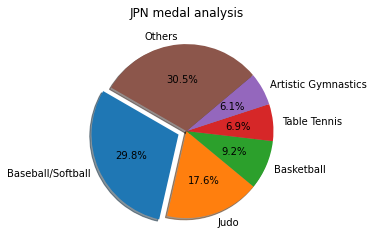

In [14]:
import matplotlib.pyplot as plt

#Définir des données à afficher et le nom à afficher
sizes = [39,23,12,9,8,40]
labels = ['Baseball/Softball', 'Judo', 'Basketball', 'Table Tennis', 'Artistic Gymnastics', 'Others']
#Définir la distance de chaque élément par rapport au centre du cercle
explode = [0.1,0,0,0,0,0]  
#Définir les couleurs
colors =['r','b'] 
plt.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 150) 
plt.title("JPN medal analysis")
plt.show()

In [15]:
top_country_medal = df_medals_total.head(5).sort_values(by=["Total"], ascending = False) #Les cinq premiers pays en termes de médailles totales gagnées pour l'analyse suivante
top_country_medal

,Rank,Country Code,Gold Medal,Silver Medal,Bronze Medal,Total,Country
0,1,USA,39,41,33,113,United States of America
1,2,CHN,38,32,18,88,People's Republic of China
4,5,ROC,20,28,23,71,ROC
3,4,GBR,22,21,22,65,Great Britain
2,3,JPN,27,14,17,58,Japan


In [16]:
from pyecharts import options as opts
from pyecharts.charts import Bar

#Récupérer les médailles d'or, d'argent et de bronze ainsi que le nom du pays et les stocker dans la liste correspondante
gold = list(top_country_medal['Gold Medal'])  
silver = list(top_country_medal['Silver Medal'])
bronze = list(top_country_medal['Bronze Medal'])
countrys = list(top_country_medal['Country Code'])

bar_chart = (
    Bar()
    .add_xaxis(countrys) #Définir la coordonnée X
    .add_yaxis("gold medal", gold, stack = "stackl", color = "#8F3605")  #Définir le nom, la valeur, la couleur, etc. de la coordonnée verticale
    .add_yaxis("silver medal", silver, stack = "stackl", color = "#838383") #Définir le nom, la valeur, la couleur, etc. de la coordonnée verticale
    .add_yaxis("bronze medal", bronze, stack = "stackl", color = "#FBED67") #Définir le nom, la valeur, la couleur, etc. de la coordonnée verticale
    .set_series_opts(label_opts = opts.LabelOpts(is_show = False))  #Définir la forme de l'étiquette
    .set_global_opts(title_opts = opts.TitleOpts(title = "Medal distribution"))  #Définir le nom du graphique circulaire
)

bar_chart.render_notebook()


In [17]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import matplotlib as mlb
import matplotlib.pyplot as plt

#Récupérer des informations sur le participant
df_athletes = pd.read_csv("athletes.csv",sep=",")

#Créez un dataframe contenant les disciplines et le nombre de sportifs masculins correspondants et de sportifs féminins correspondantes
df_gender = pd.DataFrame(df_athletes,columns= ["name","gender","discipline"])
#Compter les sportifs féminins pour chaque discipline
df_gender["gender"] = df_gender["gender"].replace({"Female":1,"Male":0})
gender = pd.DataFrame()
gender["Female"] = df_gender.groupby(["discipline"])["gender"].sum()
#Compter les sportifs masculins pour chaque discipline
df_gender["gender"] = df_gender["gender"].replace({1:0,0:1})
gender["Male"] = df_gender.groupby(["discipline"])["gender"].sum()
gender = gender.reset_index()
gender.loc["sum"] = gender[["Female","Male"]].sum()
gender

#On a au total 46 disciplines et 5495 sportifs masculins et 6002 sportifs féminins.

,discipline,Female,Male
0,3x3 Basketball,32.0,32.0
1,Archery,64.0,63.0
2,Artistic Gymnastics,98.0,95.0
3,Artistic Swimming,104.0,0.0
4,Athletics,956.0,1077.0
5,Badminton,85.0,87.0
6,Baseball/Softball,90.0,144.0
7,Basketball,144.0,144.0
8,Beach Volleyball,48.0,48.0
9,Boxing,102.0,186.0


<AxesSubplot:xlabel='discipline'>

Text(0.5, 1.0, 'Genders')

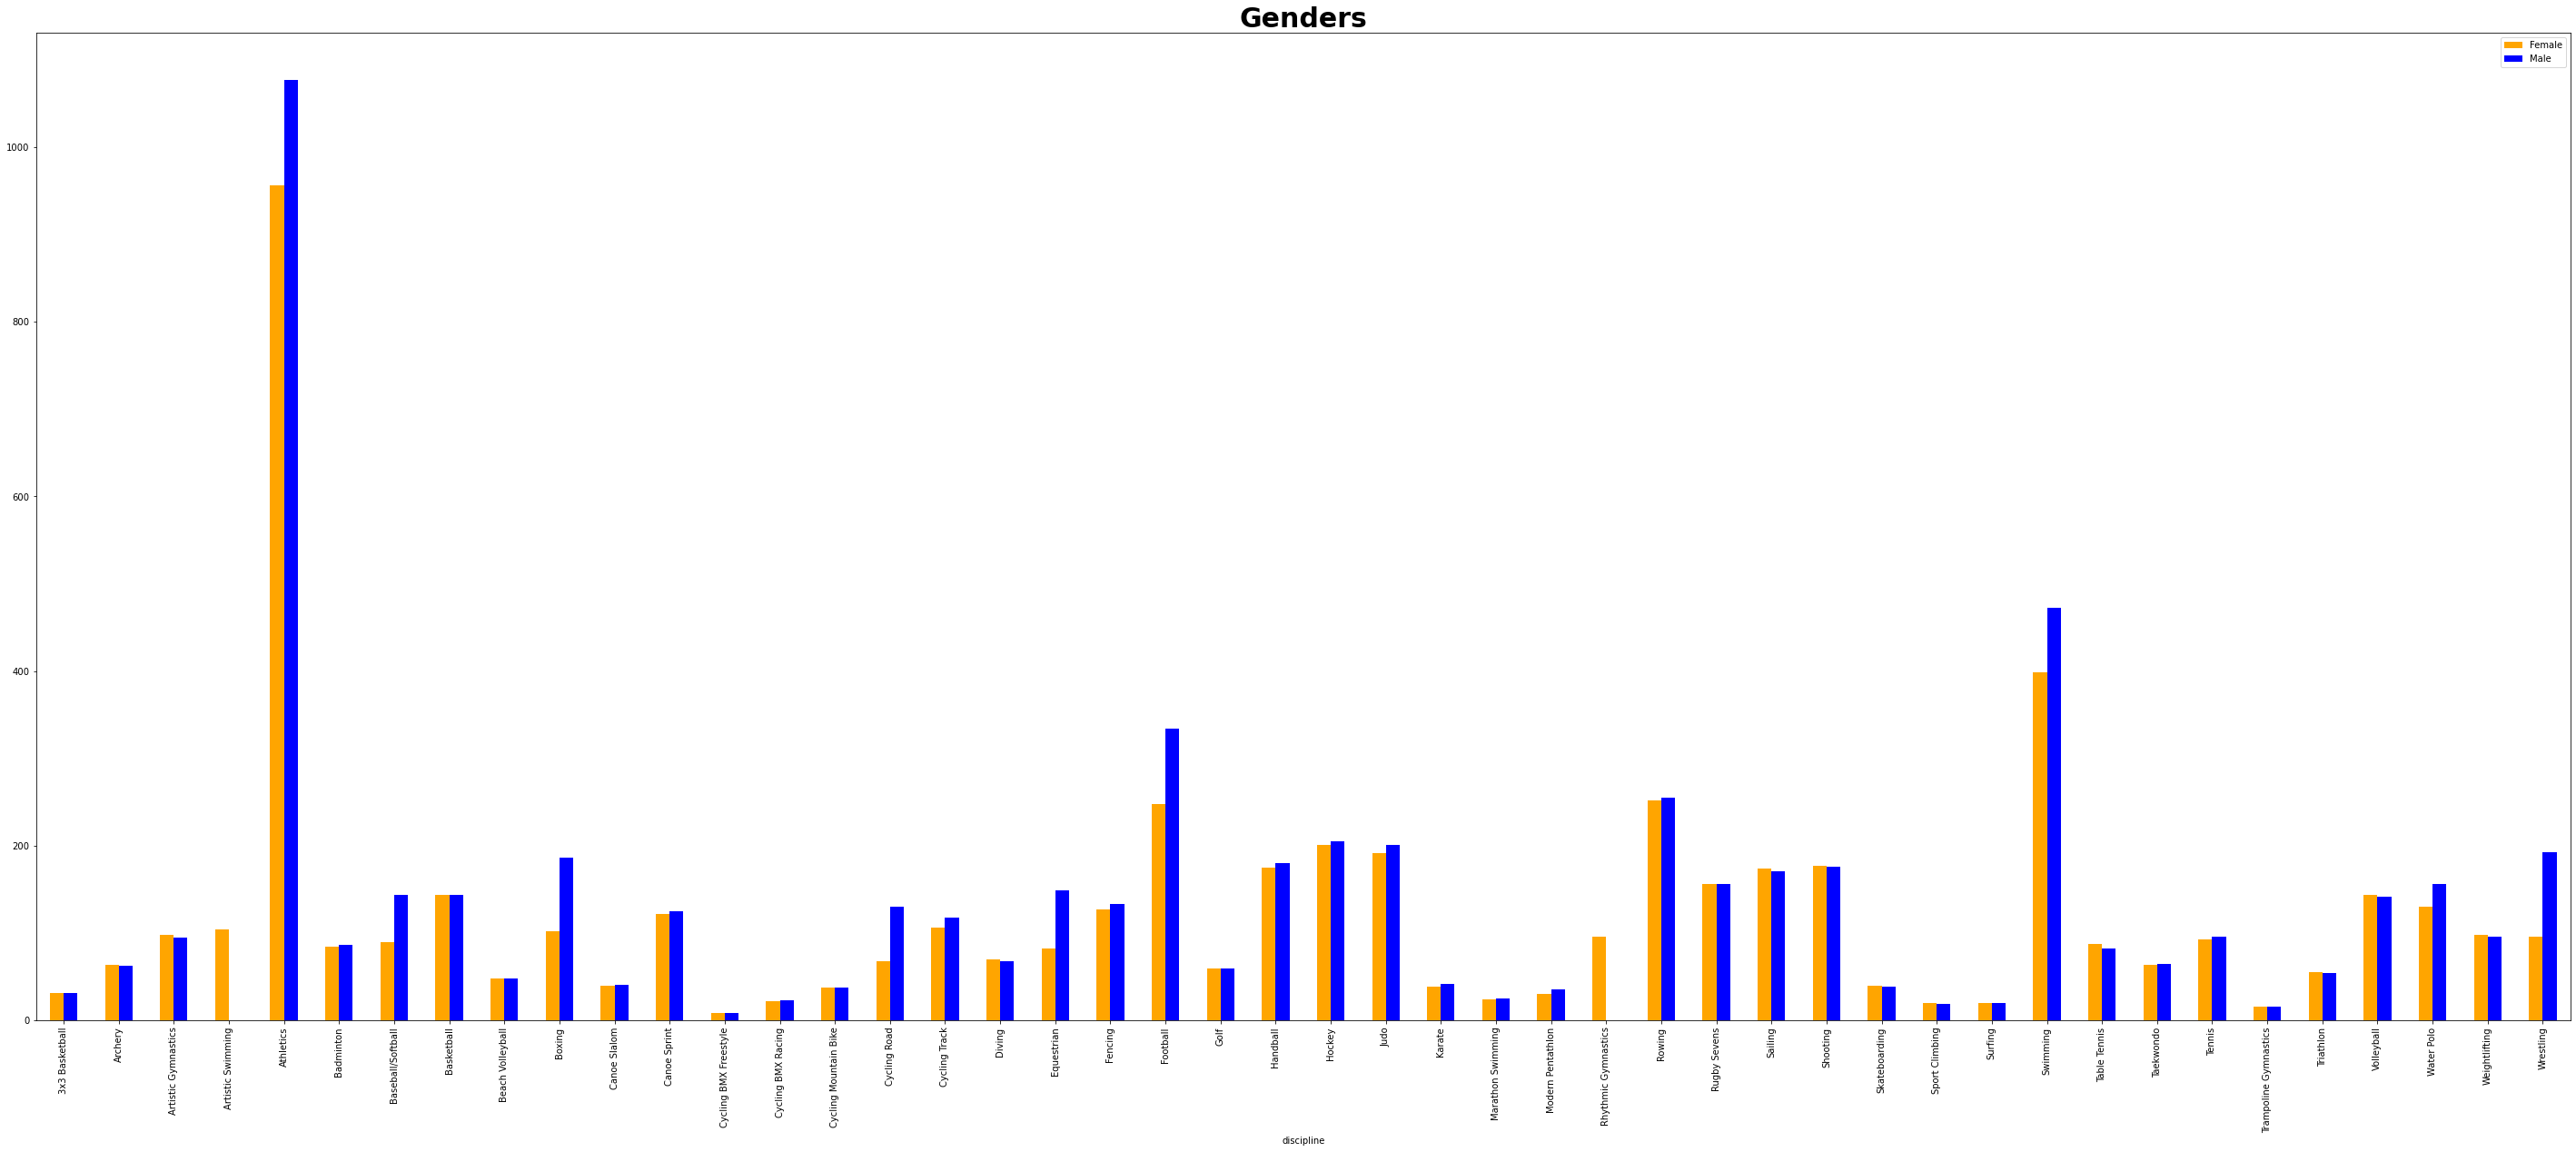

In [18]:
#Supprimer la dernière ligne 'sum' sans correction du dataframe naturel
gender = gender.drop(gender.tail(1).index,inplace = False) 
#En utilisant l'axe x pour toutes les disciplines et l'axe y pour le nombre de sportifs masculins et féminins,
#le diagramme en bâtons montre pour chaque sport le nombre des hommes et des femmes
gender.plot(kind="bar", y=['Female', 'Male'], x="discipline", figsize=(50,20), color=['orange', 'blue']) 
#Installer le format de l'image
plt.title("Genders",size = 30,weight = 'bold')

0.978897313191552

Text(0.5, 0, 'Hommes')

Text(0, 0.5, 'Femmes')

Text(0.5, 1.0, 'Corrélation entre Hommes et Femmes')

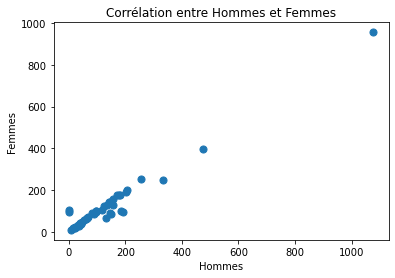

In [19]:
Hommes = gender["Male"]
Femmes = gender["Female"]
#Étudier la corrélation entre le nombre d'hommes et de femmes participants pour toutes les disciplines
Hommes.corr(Femmes)
#Graphique de la dispersion et configuration des axes, où l'axe x représente les hommes et l'axe y représente les femmes
plt.scatter(Hommes, Femmes, s=50)
plt.xlabel("Hommes",fontdict = {"size":10})
plt.ylabel("Femmes",fontdict = {"size":10})
plt.title("Corrélation entre Hommes et Femmes")
plt.show()


0.9259528912467735

Text(0.5, 0, 'Hommes')

Text(0, 0.5, 'Femmes')

Text(0.5, 1.0, 'Corrélation entre Hommes et Femmes')

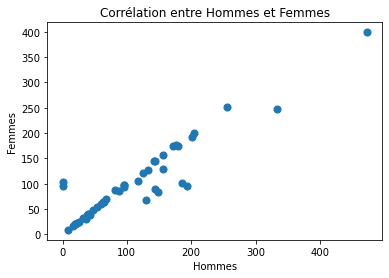

In [20]:
#Retirer le point le plus spécifique sans modifier le dataframe naturel: 
#étudier spécifiquement la corrélation entre le nombre des hommes et des femmes pour les disciplines ayant de 0 à 700 sportifs
genderSansAthletics = gender.drop(index = 4,inplace = False)
#Diagramme de la dispersion et mettre en place de nouveaux axes où l'axe x est male1 et l'axe y est female1
Hommes1 = genderSansAthletics["Male"]
Femmes1 = genderSansAthletics["Female"]
Hommes1.corr(Femmes1)
plt.scatter(Hommes1, Femmes1, s=50)
plt.xlabel("Hommes",fontdict = {"size":10})
plt.ylabel("Femmes",fontdict = {"size":10})
plt.title("Corrélation entre Hommes et Femmes")
plt.show()